In [93]:
import numpy as np
import os 
import time
import pickle

# My custom library of photoelastic tools
import sys
#sys.path.append('/eno/jdfeathe/pepe/')
sys.path.append('/home/jack//workspaces/jupyter-workspace/pepe/')

import matplotlib.pyplot as plt
plt.rcParams["figure.dpi"] = 140
plt.rcParams["font.size"] = 13

In [89]:
syntheticFolder = '/run/media/jack/Seagate Portable Drive/Research/SpaceJam_Synthetic/'
#syntheticFolder = '/eno/jdfeathe/DATA/SpaceJam_Synthetic/'

dataKey = '2022-03-29_Medium_2_Synthetic_HN'

In [90]:
fileList = os.listdir(syntheticFolder)

fileList = [f for f in fileList if dataKey in f]
fileList = fileList[:5]

pIndex = 3

fileList

['2022-03-29_Medium_2_Synthetic_HN_0',
 '2022-03-29_Medium_2_Synthetic_HN_1',
 '2022-03-29_Medium_2_Synthetic_HN_2']

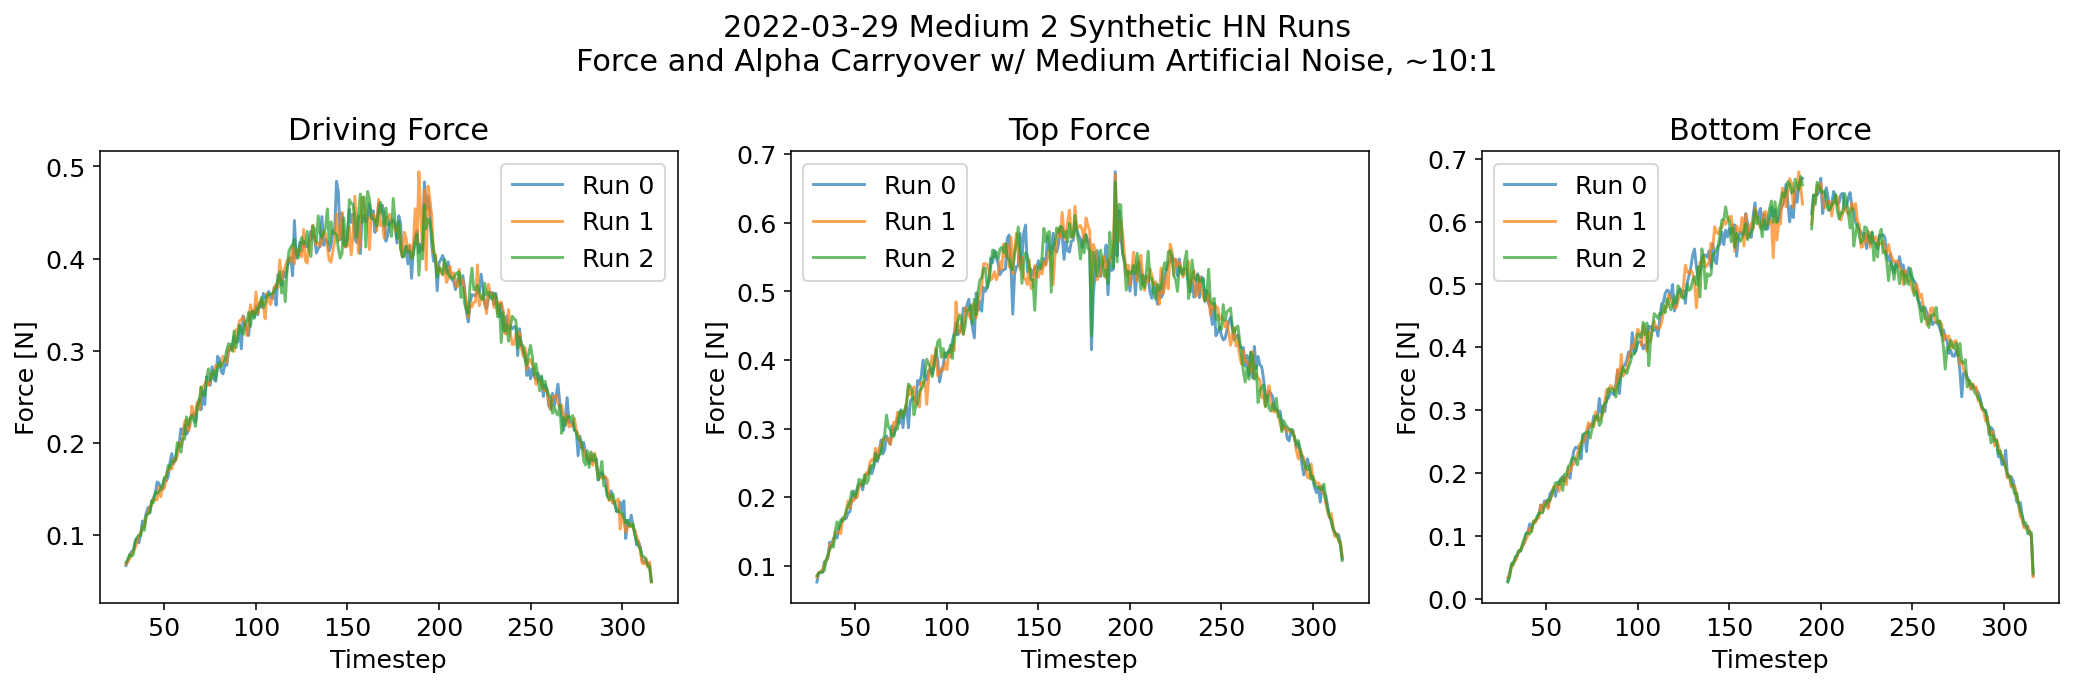

In [91]:
# Determine which particles are which across the different runs
particleIdentities = []

allForceArr = []
allBetaArr = []
allAlphaArr = []

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

for i in range(len(fileList)):
    # Load the pickles
    with open(syntheticFolder + fileList[i] + '/forces.pickle', 'rb') as f:
        forceArr = pickle.load(f)
    with open(syntheticFolder + fileList[i] + '/betas.pickle', 'rb') as f:
        betaArr = pickle.load(f)
    with open(syntheticFolder + fileList[i] + '/alphas.pickle', 'rb') as f:
        alphaArr = pickle.load(f)
    with open(syntheticFolder + fileList[i] + '/centers.pickle', 'rb') as f:
        centerArr = pickle.load(f)
    with open(syntheticFolder + fileList[i] + '/radii.pickle', 'rb') as f:
        radiusArr = pickle.load(f)
        
    # if i == 0:
    #     particleIdentities.append(np.arange(len(centerArr)))
    # else:
    #     oldInitialCenters
    
    allForceArr.append(forceArr)
    allAlphaArr.append(alphaArr)
    allBetaArr.append(betaArr)
    
    for j in range(len(forceArr[pIndex])):
        ax[j].plot(forceArr[pIndex][j], label=f'Run {i}', alpha=.7)
        
titles = ['Driving Force', 'Top Force', 'Bottom Force']
for i in range(3):
    ax[i].legend()
    ax[i].set_ylabel('Force [N]')
    ax[i].set_xlabel('Timestep')
    ax[i].set_title(titles[i])
    
fig.suptitle(f'{dataKey.replace("_", " ")} Runs\nForce and Alpha Carryover w/ Medium Artificial Noise, ~10:1')
fig.tight_layout()
plt.savefig(f'../images/{dataKey}.png')
plt.show()

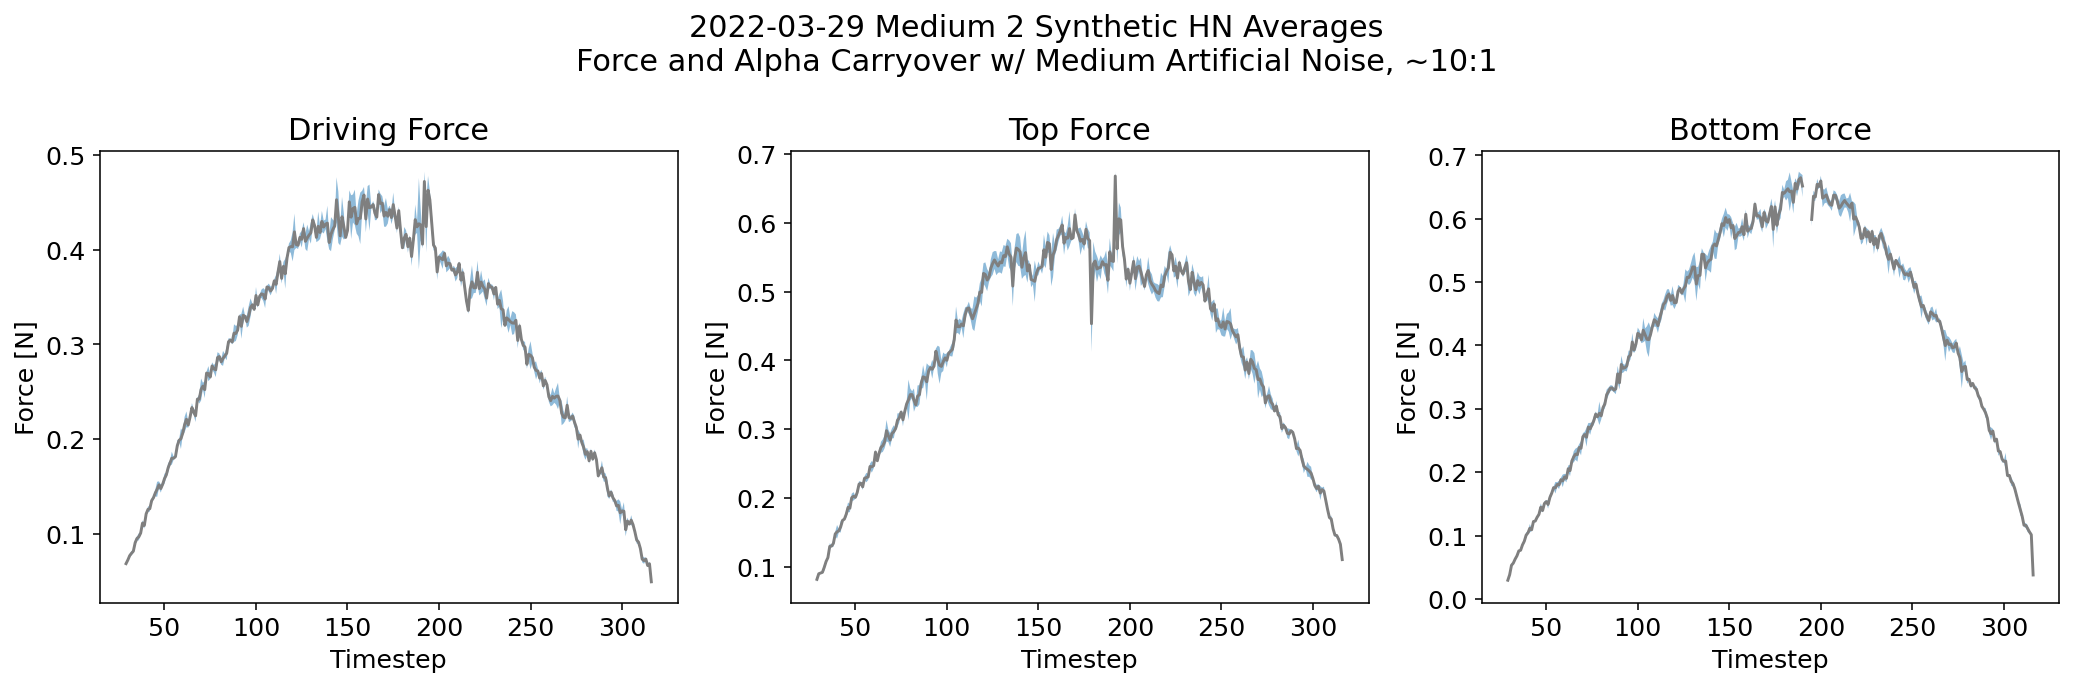

In [92]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

nSteps = np.shape(allForceArr[0][0])[-1]

averagedForceArr = np.zeros((3, nSteps))
stdForceArr = np.zeros((3, nSteps))

for i in range(3):
    averagedForceArr[i] = np.mean(np.array([f[pIndex][i] for f in allForceArr]), axis=0)
    stdForceArr[i] = np.std(np.array([f[pIndex][i] for f in allForceArr]), axis=0)
    
    ax[i].plot(averagedForceArr[i], c='tab:gray')
    ax[i].fill_between(np.arange(nSteps), averagedForceArr[i] + stdForceArr[i], averagedForceArr[i] - stdForceArr[i], alpha=.5)
    ax[i].set_ylabel('Force [N]')
    ax[i].set_xlabel('Timestep')
    ax[i].set_title(titles[i])

fig.suptitle(f'{dataKey.replace("_", " ")} Averages\nForce and Alpha Carryover w/ Medium Artificial Noise, ~10:1')

fig.tight_layout()
plt.savefig(f'../images/{dataKey}_Average.png')
plt.show()